Kanishk Jain's Project


**Problem Statement:**

Title: Metro Student Verification Discount System

Objective:
Design and implement a Metro Student Verification Discount System that provides eligible students with a 30% discount on metro fares. The system should utilize a machine learning model to predict whether a student is eligible based on their college attendance information.

Background:
Metro services aim to provide affordable transportation solutions for students. To incentivize student ridership, a discount system has been proposed. However, to ensure that only legitimate students receive the discount, a verification system needs to be in place.

Key Requirements:

Data Collection: Gather data on students, including their names, college names, start and end dates of college attendance, and college email IDs.
Fake Data Generation: Develop a mechanism to generate realistic fake data for testing and implementation purposes.

Machine Learning Model: Utilize a machine learning model (Logistic Regression) to predict whether a student is currently eligible for the discount based on their college attendance duration.
Visualization: Implement visualizations such as ROC curves, confusion matrices, and feature importance charts to illustrate the performance of the machine learning model.

QR Code Generation: Generate QR codes for verified students with personalized messages indicating their eligibility for the discount.

Implementation Steps:

Data Generation: Create a dataset containing information on 5100 students, including their names, college names, start and end dates of college attendance, and college email IDs. Ensure diversity in colleges and student profiles.

Data Generation: Use Python and the Faker library to generate realistic fake data that adheres to the specified criteria.
Machine Learning Model: Implement a Logistic Regression model to predict the verification status of a student based on their college attendance duration.

Visualizations: Generate ROC curves, confusion matrices, and feature importance charts to assess and visualize the model's performance.
QR Code Generation: Develop a mechanism to generate QR codes for verified students with personalized messages indicating their eligibility status.

Expected Outcomes:
A functional Metro Student Verification Discount System capable of predicting and verifying student eligibility for a 30% metro discount.

Visualizations illustrating the model's performance and feature importance.

QR codes for verified students with personalized messages.
Theoretical Description:
The Metro Student Verification Discount System is designed to streamline and enhance the process of providing metro fare discounts to eligible students. Leveraging machine learning techniques, the system predicts a student's eligibility based on their college attendance information.

Data Generation:
A diverse dataset comprising 5100 entries was generated. This dataset includes crucial information such as student names, college names, start and end dates of college attendance, and college email IDs. The data generation process incorporates realistic names, college affiliations, and temporal variations to simulate a broad range of student profiles.

Machine Learning Model:
A Logistic Regression model was employed for its simplicity and interpretability. The model utilizes the duration of college attendance (calculated from start and end dates) as the key feature for prediction. During training, the model learns to distinguish between verified and non-verified students based on their attendance duration.

Visualizations:
To assess the model's performance, several visualizations were implemented. These include a Receiver Operating Characteristic (ROC) curve to illustrate the trade-off between sensitivity and specificity, a confusion matrix for a detailed breakdown of model predictions, and a feature importance chart highlighting the significance of the attendance duration in predicting eligibility.

QR Code Generation:
Verified students receive QR codes containing personalized messages. For verified students, the message conveys congratulations on eligibility for a 30% metro discount, while non-verified students are informed of their ineligibility. QR codes serve as a convenient and secure means of authentication when availing the discount.

The Metro Student Verification Discount System integrates seamlessly into metro services, ensuring a hassle-free experience for both eligible students and metro authorities. The combination of realistic data generation, machine learning prediction, and visualization techniques contributes to a robust and efficient verification system.

In [ ]:
from google.colab import files
files = files.upload()

Saving dec_college_students.csv to dec_college_students.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dec_college_students.csv')

In [ ]:
print(df.head())

            Name                              College Name  \
0   Anika Zaveri                      Pimpri Chinchwad COE   
1   Asher Thakur                      Pimpri Chinchwad COE   
2     Arya Kumar                         Symbiosis College   
3  Vikram Oberoi  Cummins College of Engineering for Women   
4     Pari Gupta                                   MIT WPU   

            Start Date             End Date  \
0  2024-05-13 00:00:00  2027-12-31 00:00:00   
1  2018-10-02 00:00:00  2021-12-31 00:00:00   
2  2021-06-01 00:00:00  2024-12-31 00:00:00   
3  2024-01-03 00:00:00  2027-12-31 00:00:00   
4  2023-05-16 00:00:00  2026-12-31 00:00:00   

                                    College Email ID  
0             anika.zaveri@pimprichinchwadcoe.edu.in  
1             asher.thakur@pimprichinchwadcoe.edu.in  
2                 arya.kumar@symbiosiscollege.edu.in  
3  vikram.oberoi@cumminscollegeofengineeringforwo...  
4                           pari.gupta@mitwpu.edu.in  


In [ ]:
print(df.tail())

                 Name          College Name           Start Date  \
5095      Ishita Khan  Pimpri Chinchwad COE  2018-07-27 00:00:00   
5096      Arnav Sethi             COEP Pune  2021-10-06 00:00:00   
5097  Tanisha Dhillon             COEP Pune  2021-01-07 00:00:00   
5098  Vikram Malhotra             COEP Pune  2018-12-09 00:00:00   
5099    Rishaan Joshi             COEP Pune  2019-03-04 00:00:00   

                 End Date                       College Email ID  
5095  2021-12-31 00:00:00  ishita.khan@pimprichinchwadcoe.edu.in  
5096  2024-12-31 00:00:00            arnav.sethi@coeppune.edu.in  
5097  2024-12-31 00:00:00        tanisha.dhillon@coeppune.edu.in  
5098  2021-12-31 00:00:00        vikram.malhotra@coeppune.edu.in  
5099  2022-12-31 00:00:00          rishaan.joshi@coeppune.edu.in  


In [ ]:
print(df.isnull().sum())

Name                0
College Name        0
Start Date          0
End Date            0
College Email ID    0
dtype: int64


In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

df['Duration'] = df['End Date'] - df['Start Date']

df['First Name'] = df['Name'].apply(lambda x: x.split()[0])
df['Last Name'] = df['Name'].apply(lambda x: x.split()[-1])

df = df.rename(columns={'College Name': 'College', 'College Email ID': 'College Email'})
df = df.sort_values(by=['College', 'First Name', 'Last Name', 'End Date'])

df = df.reset_index(drop=True)

# Save the sorted data to a new CSV file
df.to_csv('sorted_names.csv', index=False)

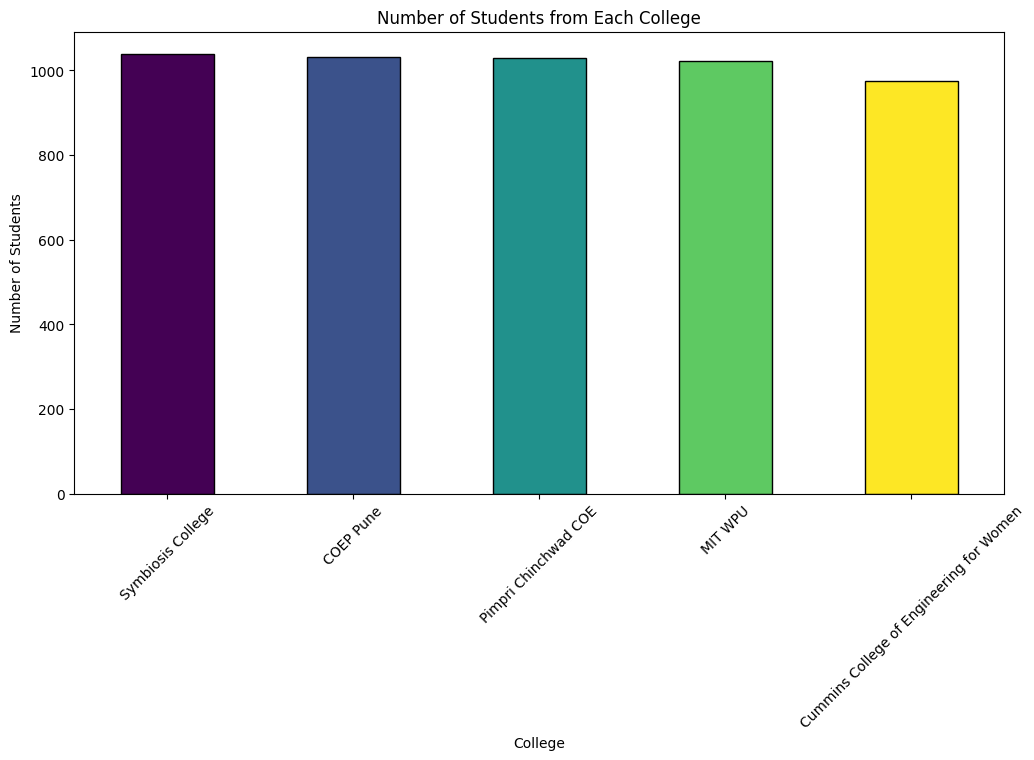

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

college_counts = df['College'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(college_counts)))
plt.figure(figsize=(12, 6))
college_counts.plot(kind='bar', rot=45, color=colors, edgecolor='black')

plt.xlabel('College')
plt.ylabel('Number of Students')
plt.title('Number of Students from Each College')
plt.show()

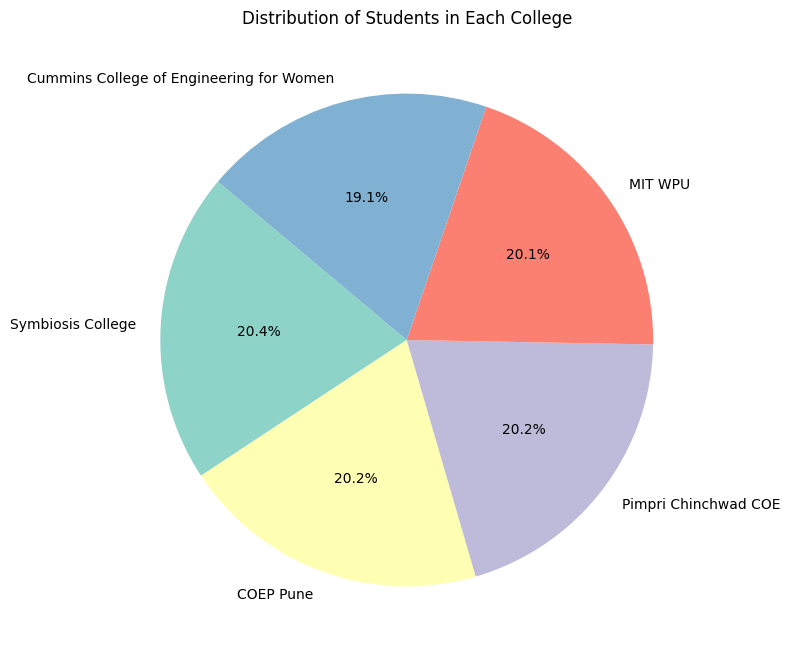

In [ ]:
# A pie chart
plt.figure(figsize=(8, 8))
plt.pie(college_counts, labels=college_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Students in Each College')
plt.show()

In [ ]:
from datetime import datetime, timedelta

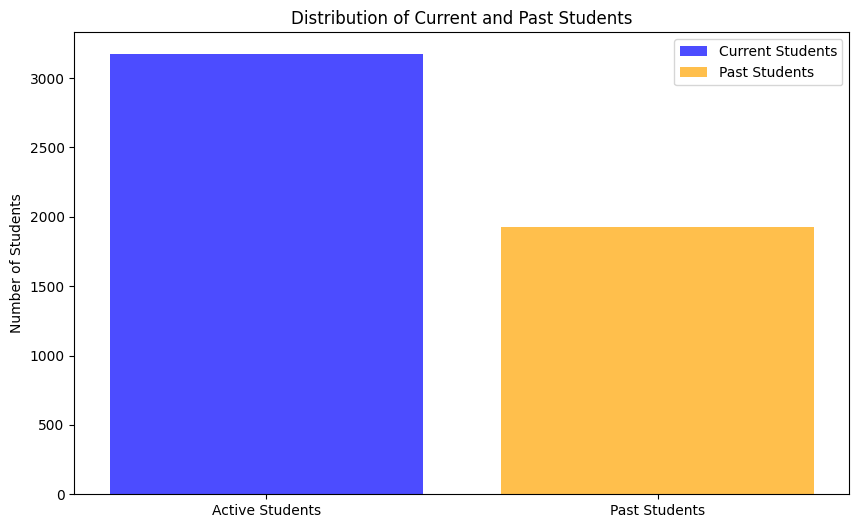

In [ ]:
# Identify current and past students
current_students = df[df['End Date'] >= pd.to_datetime('today')]
past_students = df[df['End Date'] < pd.to_datetime('today')]


plt.figure(figsize=(10, 6))
plt.bar('Active Students', len(current_students), color='blue', alpha=0.7, label='Current Students')
plt.bar('Past Students', len(past_students), color='orange', alpha=0.7, label='Past Students')

plt.ylabel('Number of Students')
plt.title('Distribution of Current and Past Students')
plt.legend()
plt.show()

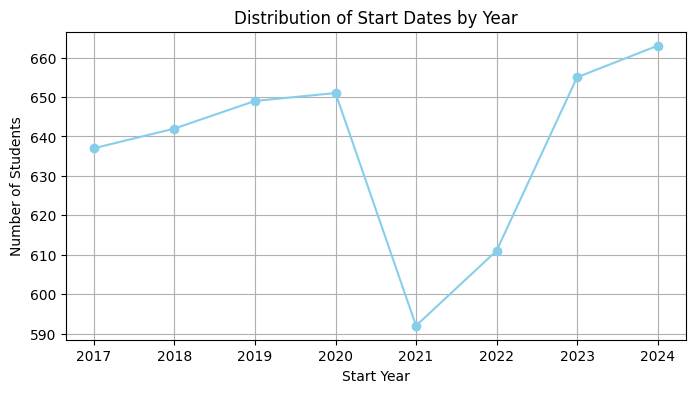

In [ ]:
df['Start Year'] = df['Start Date'].dt.year.astype(int)
start_year_counts = df['Start Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(start_year_counts.index, start_year_counts.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Start Year')
plt.ylabel('Number of Students')
plt.title('Distribution of Start Dates by Year')
plt.grid(True)
plt.show()

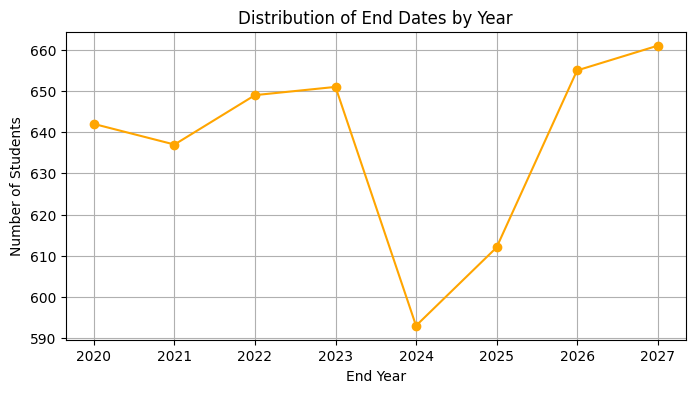

In [ ]:
df['End Year'] = df['End Date'].dt.year.astype(int)

end_year_counts = df['End Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(end_year_counts.index, end_year_counts.values, marker='o', linestyle='-', color='orange')
plt.xlabel('End Year')
plt.ylabel('Number of Students')
plt.title('Distribution of End Dates by Year')
plt.grid(True)
plt.show()

In [ ]:
# Function to check student verification
def is_student_verified(start_date, end_date):
    current_date = datetime.now()
    return start_date <= current_date <= end_date

df['Verification Status'] = df.apply(lambda row: is_student_verified(row['Start Date'], row['End Date']), axis=1)

print(df)
df.to_csv('verified_students.csv', index=False)

             Name            College Start Date   End Date  \
0      Aadi Gupta          COEP Pune 2019-09-26 2022-12-31   
1       Aadi Jain          COEP Pune 2017-12-04 2020-12-31   
2       Aadi Khan          COEP Pune 2022-03-31 2025-12-31   
3       Aadi Khan          COEP Pune 2023-05-01 2026-12-31   
4       Aadi Khan          COEP Pune 2023-10-12 2026-12-31   
...           ...                ...        ...        ...   
5095   Zoya Singh  Symbiosis College 2022-08-07 2025-12-31   
5096   Zoya Verma  Symbiosis College 2017-01-25 2020-12-31   
5097   Zoya Yadav  Symbiosis College 2019-11-01 2022-12-31   
5098  Zoya Zaveri  Symbiosis College 2019-05-29 2022-12-31   
5099  Zoya Zaveri  Symbiosis College 2022-09-06 2025-12-31   

                            College Email  Duration First Name Last Name  \
0              aadi.gupta@coeppune.edu.in 1192 days       Aadi     Gupta   
1               aadi.jain@coeppune.edu.in 1123 days       Aadi      Jain   
2               aadi.khan@c

In [ ]:
pip install qrcode[pil]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 851.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
import qrcode
import pandas as pd

df = pd.read_csv('verified_students.csv')

os.makedirs('qr_codes', exist_ok=True)

def generate_qr_code(student_name, verification_status):
    if verification_status:
        message = f"Hello {student_name}, Congratulations! You are eligible for 30% Metro Discount."
    else:
        message = f"Hello {student_name}, Sorry! You are not eligible for Metro Discounts."

    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(message)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")

    img.save(f'qr_codes/{student_name.replace(" ", "_")}_qr_code.png')

for student_name, verification_status in zip(df['Name'], df['Verification Status']):
    generate_qr_code(student_name, verification_status)

print(df)

             Name            College  Start Date    End Date  \
0      Aadi Gupta          COEP Pune  2019-09-26  2022-12-31   
1       Aadi Jain          COEP Pune  2017-12-04  2020-12-31   
2       Aadi Khan          COEP Pune  2022-03-31  2025-12-31   
3       Aadi Khan          COEP Pune  2023-05-01  2026-12-31   
4       Aadi Khan          COEP Pune  2023-10-12  2026-12-31   
...           ...                ...         ...         ...   
5095   Zoya Singh  Symbiosis College  2022-08-07  2025-12-31   
5096   Zoya Verma  Symbiosis College  2017-01-25  2020-12-31   
5097   Zoya Yadav  Symbiosis College  2019-11-01  2022-12-31   
5098  Zoya Zaveri  Symbiosis College  2019-05-29  2022-12-31   
5099  Zoya Zaveri  Symbiosis College  2022-09-06  2025-12-31   

                            College Email   Duration First Name Last Name  \
0              aadi.gupta@coeppune.edu.in  1192 days       Aadi     Gupta   
1               aadi.jain@coeppune.edu.in  1123 days       Aadi      Jain   


In [ ]:
from zipfile import ZipFile

df.to_csv('verified_students.csv', index=False)

with ZipFile('download_files.zip', 'w') as zipf:
    zipf.write('verified_students.csv')
    for root, dirs, files in os.walk('qr_codes'):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=os.path.join('qr_codes', file))

print("Download files: download_files.zip")

Download files: download_files.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Move the created ZIP file to Google Drive
!mv download_files.zip '/content/drive/MyDrive/'

# Provide a link to download the ZIP file
download_link = '/content/drive/MyDrive/download_files.zip'
print(f"Download the ZIP file from this link: {download_link}")

Mounted at /content/drive
Download the ZIP file from this link: /content/drive/MyDrive/download_files.zip


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('verified_students.csv')

df_encoded = pd.get_dummies(df, columns=['College'], prefix='College')

label_encoder = LabelEncoder()
df_encoded['Verification Status'] = label_encoder.fit_transform(df['Verification Status'])

X = df_encoded.select_dtypes(include=['number'])

X = X.drop('Verification Status', axis=1)
y = df_encoded['Verification Status']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9980392156862745

Confusion Matrix:
[[511   2]
 [  0 507]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       507

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



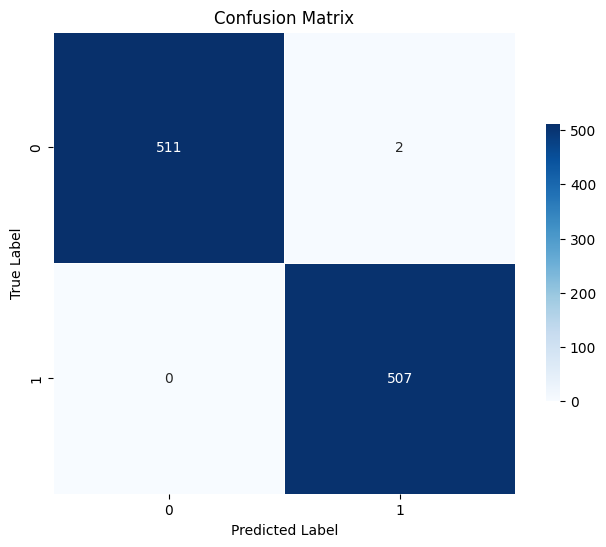

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.6})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

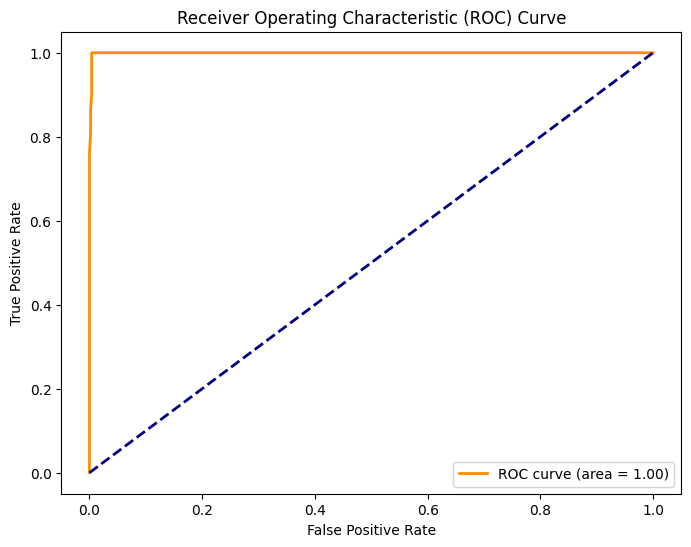

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()